<a href="https://colab.research.google.com/github/J0SAL/Learning-DL/blob/main/codebasics/8.%20Transfer_Learning/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning in image classification

In [36]:
import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [12]:
# using model from tenserflow hub
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

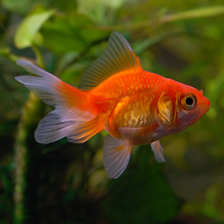

In [13]:
# testing the model with fish dataset
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [14]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [15]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [16]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [17]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [22]:
tf.keras.utils.get_file('.','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/root/.keras/datasets/.'

In [24]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [25]:
image_labels[predicted_label_index]

'goldfish'

# Now **Load flowers** dataset

In [26]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [27]:
data_dir

'./datasets/flower_photos'

In [28]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [29]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/5674707921_1ffd141bab_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14576445793_582aa6446b_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/148180650_19a4b410db.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15268682367_5a4512b29f_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/160456948_38c3817c6a_m.jpg')]

In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [33]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg')]

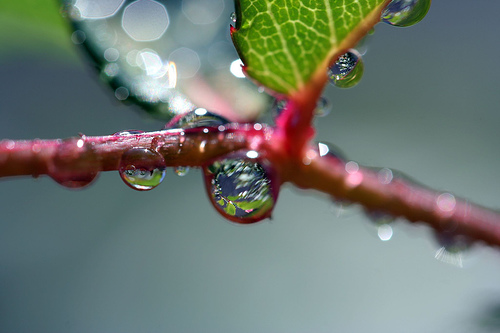

In [37]:
PIL.Image.open(str(roses[1]))

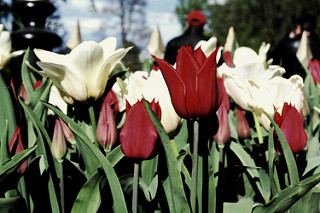

In [38]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

In [39]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [40]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg')]

In [41]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'

In [42]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [43]:
img.shape

(240, 159, 3)

In [44]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [45]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [46]:
X = np.array(X)
y = np.array(y)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [48]:
X[0].shape

(224, 224, 3)

In [49]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [50]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

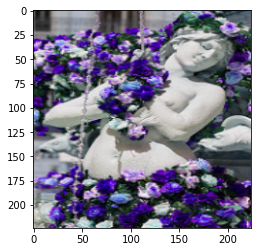

In [52]:
# plt.axis('off')
plt.imshow(X[0])

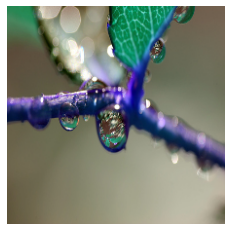

In [53]:
plt.axis('off')
plt.imshow(X[1])

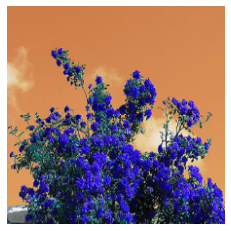

In [54]:
plt.axis('off')
plt.imshow(X[2])

In [61]:
# if model is directly used it gives incorrect result 
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 917])

In [56]:
image_labels[795]

'shower curtain'

**Now take pre-trained model and retrain it using flowers images**

In [57]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
# train = false i.e. freeze

In [58]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, #keep same as trained
  tf.keras.layers.Dense(num_of_flowers) #only train this
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [59]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 72s 763ms/step - loss: 0.8174 - acc: 0.6955
Epoch 2/5
86/86 [==============================] - 65s 760ms/step - loss: 0.4296 - acc: 0.8561
Epoch 3/5
86/86 [==============================] - 72s 837ms/step - loss: 0.3352 - acc: 0.8881
Epoch 4/5
86/86 [==============================] - 65s 760ms/step - loss: 0.2825 - acc: 0.9059
Epoch 5/5
86/86 [==============================] - 69s 806ms/step - loss: 0.2397 - acc: 0.9291


In [60]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 765ms/step - loss: 0.3572 - acc: 0.8747


[0.35719069838523865, 0.8747276663780212]